<a href="https://colab.research.google.com/github/toliyang/AI_ML/blob/main/Deep%20Learning/S_39_1%20ANN%20(Regression)/Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


'2.19.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [27]:
# use url as the file path
fp = 'https://raw.githubusercontent.com/toliyang/AI_ML/refs/heads/main/Deep%20Learning/S_39_1%20ANN%20(Regression)/Folds5x2_pp_adj.csv'

# read as dataframe for applicable data elements
dataset = pd.read_csv(fp)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


### Splitting the dataset into the Training set and Test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Part 2 - Building the ANN

In [29]:
# import tf lib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, R2Score

In [30]:
tf.__version__

'2.19.0'

### Initializing the ANN

In [31]:

ann = Sequential()

### Adding the input layer and the first hidden layer

In [32]:
ann.add(Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [33]:
ann.add(Dense(units=6, activation='relu'))

### Adding the output layer

In [34]:
ann.add(Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [35]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=[MeanSquaredError(),
        MeanAbsoluteError(),
        R2Score()])

### Training the ANN model on the Training set

In [41]:

history = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 100.1103 - mean_absolute_error: 8.0529 - mean_squared_error: 100.1103 - r2_score: 0.6566
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 86.2396 - mean_absolute_error: 7.4683 - mean_squared_error: 86.2396 - r2_score: 0.7038
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 72.4181 - mean_absolute_error: 6.8633 - mean_squared_error: 72.4181 - r2_score: 0.7501
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 60.0912 - mean_absolute_error: 6.2203 - mean_squared_error: 60.0912 - r2_score: 0.7948
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 50.8277 - mean_absolute_error: 5.7911 - mean_squared_error: 50.8277 - r2_score: 0.8241
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 44.8070 - mean_absolute_error: 5.3740 - mean_squared_error: 44.8070 - r2_score: 0.8461
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 39.0704 - mean_absolute_error: 4.9861 - mean_squa

### Predicting the results of the Test set

In [42]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[429.11 426.18]
 [448.46 451.1 ]
 [443.98 442.87]
 ...
 [454.97 454.2 ]
 [448.01 444.13]
 [430.33 436.58]]


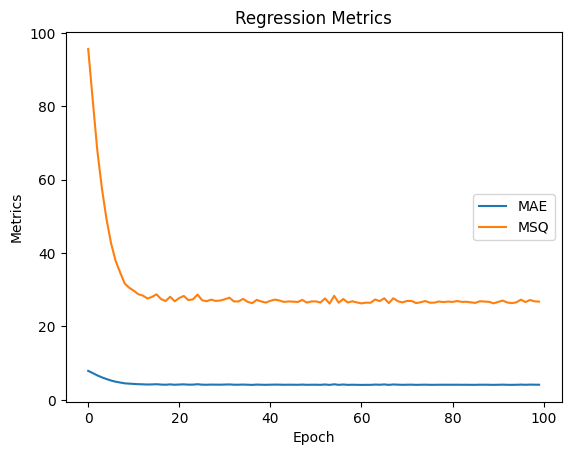

In [43]:
# Plot training & validation Mean Absolute Error values
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['mean_squared_error'])
plt.title('Regression Metrics')
plt.ylabel('Metrics')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSQ'], loc='right')
plt.show()

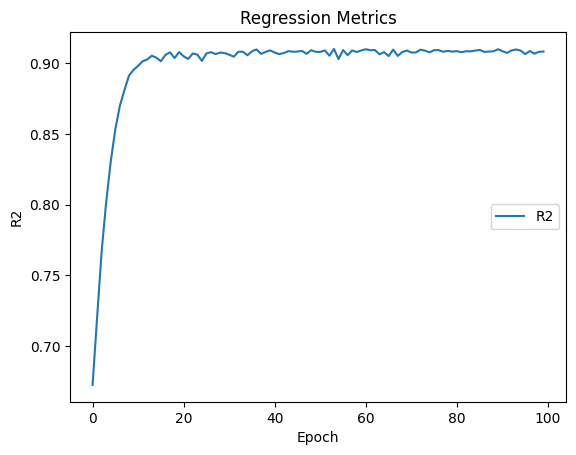

In [44]:
# Plot training & validation Mean Absolute Error values
plt.plot(history.history['r2_score'])
plt.title('Regression Metrics')
plt.ylabel('R2')
plt.xlabel('Epoch')
plt.legend(['R2'], loc='right')
plt.show()

In [ ]:
print(dataset.columns)

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')


Text(0, 0.5, 'Dep Var')

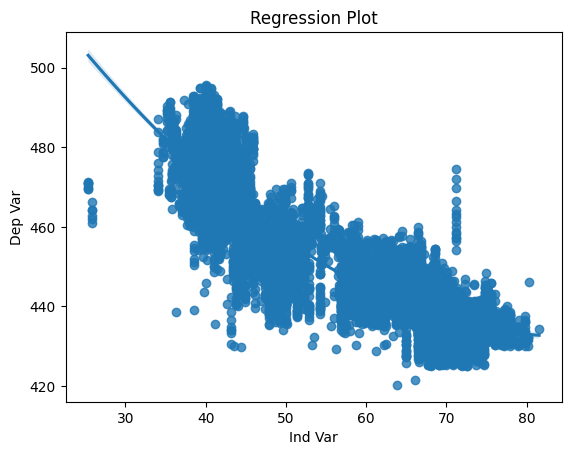

In [45]:
# residual plot
# Plot 1: Standard regression plot

ax = sns.regplot(data=dataset, x=dataset['V'], y=dataset['PE'], order=2)
ax.set_title('Regression Plot')
ax.set_xlabel('Ind Var')
ax.set_ylabel('Dep Var')